In [ ]:
!pip install -q pydot
!pip install graphviz(apt-get install graphviz)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install graphviz(apt-get install graphviz)'


# [**Sequentail** **API**]

In [ ]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.




*   위와 같은 sequential API 방식은 직관적이고 편리하지만 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 인공 신경망을 구현할 수 없다.



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


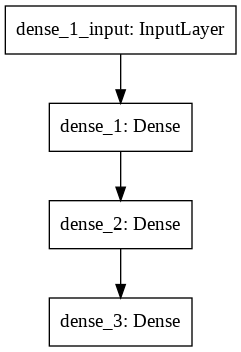

In [ ]:
from tensorflow import keras

keras.utils.plot_model(model, 'my_first_model.png')

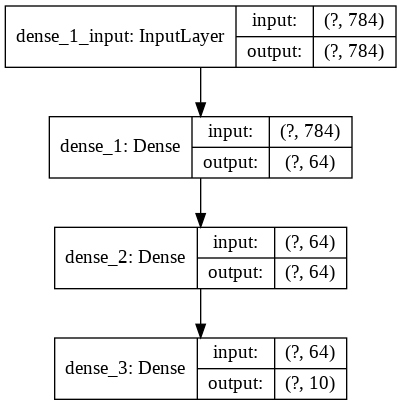

In [ ]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

# [**Funtional API**]



*  functional API는 각 층을 일종의 함수(function)로서 정의한다.
*  이때 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계한다.


## [Functional API를 이용하여 fully-connected neural network 만들어보기]

In [ ]:
from tensorflow.keras.layers import Input

inputs=Input(shape=(10,))  #10개의 입력을 받는 입력층

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

hidden1=Dense(64, activation='relu')(inputs)    #은닉층 추가(hidden1 layer)
hidden2=Dense(64, activation='relu')(hidden1)   #은닉층 추가(hidden2 layer)
output=Dense(1, activation='sigmoid')(hidden2)  #출력층 추가

model=Model(inputs=inputs, outputs=output)  #입력 텐서와 출력 텐서를 정의하여 하나의 모델을 구성한다.



*   Input( ) 함수에 입력의 크기를 정의한다.
*   이전 층을 다음 층 함수의 입력으로 사용하고, 변수에 할당한다.
*   Model( ) 함수에 입려과 출력을 정의한다.
*   model로 저장함으로써 sequentail API와 동일하게 compile, fit 등을 사용할 수 있다.



In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

# [Functional API를 이용하여 다중 입력과 다중 출력을 가지는 모델 만들어보기]

*   functioanl API의 가장 큰 장점은 다중 입력과 다중 출력을 가지는 모델을 만들 수 있다는 점이다.



In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

#두 개의 입력층을 정의한다.
input1=Input(shape=(64,))
input2=Input(shape=(128,))

In [ ]:
#input1에 대한 neural network 정의

x=Dense(16, activation='relu')(input1)
x=Dense(8, activation='relu')(x)
x=Model(inputs=input1, outputs=x)

In [ ]:
#input2에 대한 neural network 정의

y=Dense(64, activation='relu')(input2)
y=Dense(32, activation='relu')(y)
y=Dense(8, activation='relu')(y)
y=Model(inputs=input2, outputs=y)

In [ ]:
result=concatenate([x.output, y.output])



*   concatenate를 이용하여 두 개의 neural networks(인공 신경망)의 출력을 연결한다.



In [ ]:
z=Dense(2, activation='relu')(result)
z=Dense(1, activation='linear')(z)

model=Model(inputs=[x.input, y.input],outputs=z)



*   concatenate로 연결한 두 개의 출력을 다시 입력으로 받는 Dense layer을 추가한다.
*   최종적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후에 하나의 출력을 예측하는 모델이 된다.

